In [1]:
import tensorflow as tf

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)


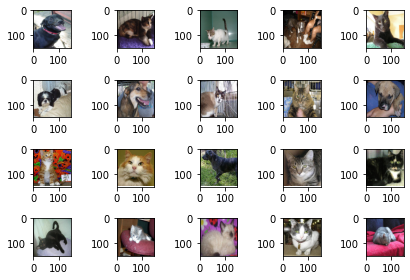

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '../data/cat_dog_full/train'   # cats folder, dogs folder
valid_dir = '../data/cat_dog_full/validation'

# ImageDataGenerator를 생성한다!
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
# 정규화 기능을 포함하고 있다!

train_generator = train_datagen.flow_from_directory(
    train_dir,   # target directory
    classes=['cats', 'dogs'],  # cats 폴더에 들어있는 Image들은 모두 class(label)를 0으로
                               # dogs 폴더에 들어있는 Image들은 모두 class(label)를 1로
                               # 이 속성이 생략되면 폴더 순서대로 잡힌다.
    target_size=(150,150),  # Image resize (세로, 가로)
    batch_size=20,  # generator가 한번에 뽑아내는 image의 개수
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,   # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

for x_data, t_data in train_generator:
    print(x_data.shape)   # (20, 150, 150, 3)
    print(t_data.shape)   # (20,)
    break
    
figure = plt.figure()
ax = []

for i in range(20):
    ax.append(figure.add_subplot(4,5,i+1))
    
    
for x_data, t_data in train_generator:
    print(x_data.shape)   # (20, 150, 150, 3)
    print(t_data.shape)   # (20,)
    
    for idx, img_data in enumerate(x_data):
    # 맨 앞을 index로 쓰고 나머지를 img_data로 쓴다.
        ax[idx].imshow(img_data)
        
    break
    
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

model = Sequential()

##################################################  1 Conv2D, Pooling
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))


##################################################  2 Conv2D
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))


##################################################  3 Conv2D, Pooling
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))


##################################################  4 Conv2D, Pooling
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))


#### feature extraction ####


##################################################  5 Input Layer
model.add(Flatten())   # 4차원 데이터를 2차원으로 만든다.
                       # 이미지 개수는 두고 이미지의 정보를 1차원으로 만든다.


##################################################  6 Hidden Layer
model.add(Dense(units=256,
                activation='relu'))


##################################################  7 Output Layer
model.add(Dense(units=1,
                activation='sigmoid'))   # 2 분류 확률 값을 알아야 하니까 sigmoid

print(model.summary())   # model 정보 요약해서 보기

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

In [4]:
### optimizer 설정

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,      # 14000개 이미지, 20개씩 뽑아낸다.
                    steps_per_epoch=700,  # 700번 반복해야 14000개 뽑아낸다.
                    epochs=30,
                    validation_data=validation_generator,  # 6000개 이미지, 20개
                    validation_steps=300)

model.save('../data/cats_dogs_full_cnn_model.h5')

Epoch 1/30
700/700 [==============================] - 921s 1s/step - loss: 0.6005 - accuracy: 0.6613 - val_loss: 0.5747 - val_accuracy: 0.6993
Epoch 2/30
700/700 [==============================] - 897s 1s/step - loss: 0.4997 - accuracy: 0.7569 - val_loss: 0.4895 - val_accuracy: 0.7560
Epoch 3/30
700/700 [==============================] - 902s 1s/step - loss: 0.4363 - accuracy: 0.7974 - val_loss: 0.4483 - val_accuracy: 0.7937
Epoch 4/30
700/700 [==============================] - 904s 1s/step - loss: 0.3914 - accuracy: 0.8220 - val_loss: 0.4279 - val_accuracy: 0.8010
Epoch 5/30
700/700 [==============================] - 901s 1s/step - loss: 0.3561 - accuracy: 0.8425 - val_loss: 0.3957 - val_accuracy: 0.8272
Epoch 6/30
700/700 [==============================] - 901s 1s/step - loss: 0.3138 - accuracy: 0.8622 - val_loss: 0.3899 - val_accuracy: 0.8282
Epoch 7/30
700/700 [==============================] - 936s 1s/step - loss: 0.2754 - accuracy: 0.8836 - val_loss: 0.3905 - val_accuracy: 0.8323

OSError: Unable to create file (unable to open file: name = './data/cats_dogs_full_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)